In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
  fig=plt.figure(figsize=(12,10))
  ax=fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

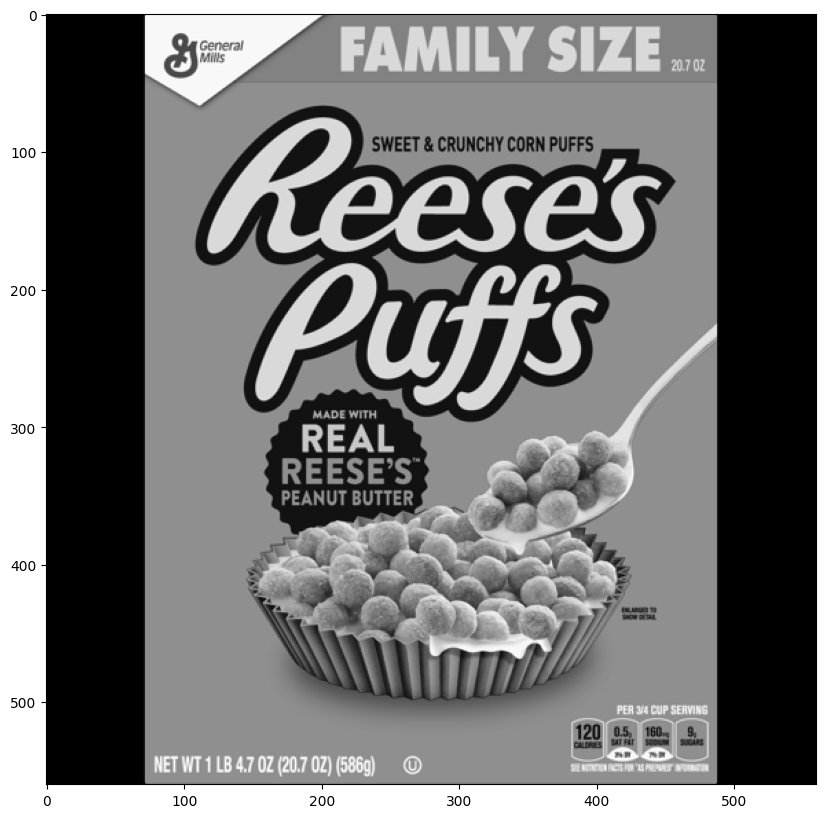

In [4]:
reeses=cv2.imread('/content/reeses_puffs.png',0)
display(reeses)

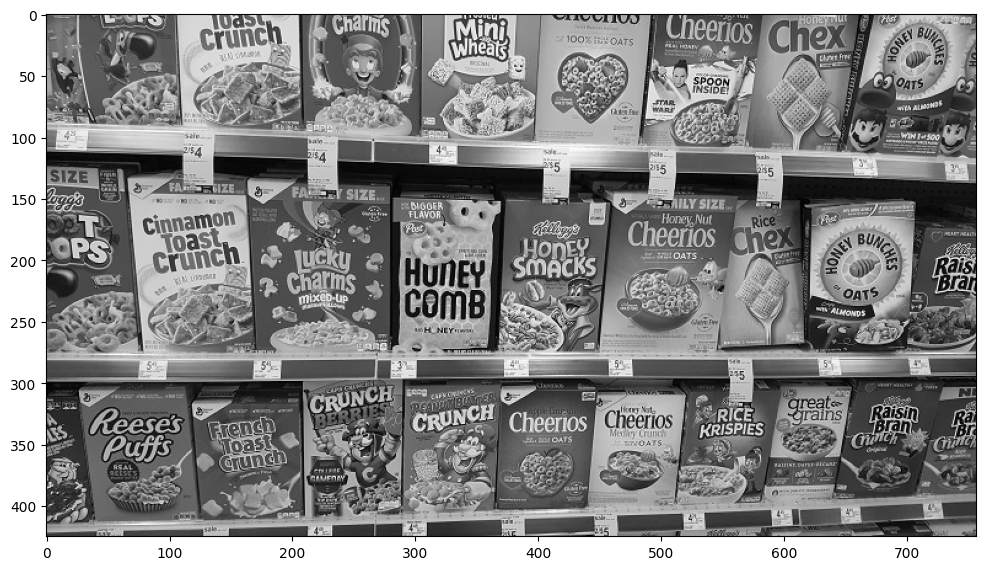

In [6]:
cereals=cv2.imread('/content/many_cereals.jpg',0)
display(cereals)

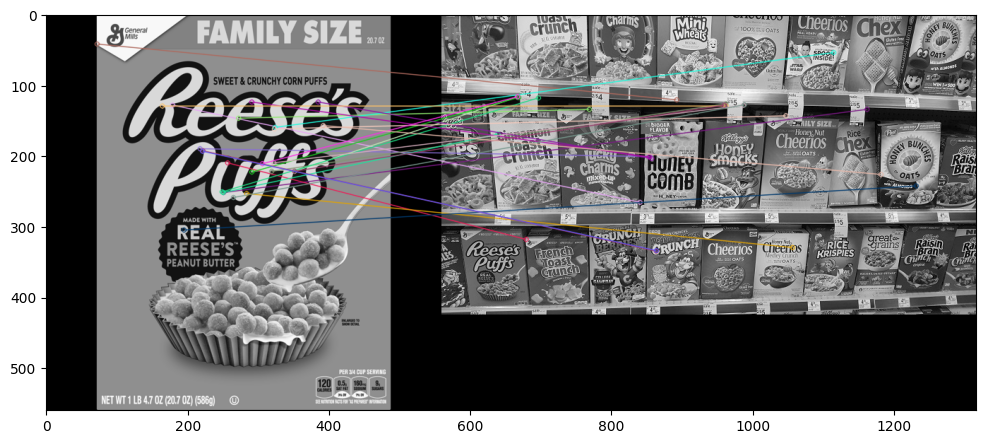

In [8]:
orb=cv2.ORB_create()
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)
matches=sorted(matches,key=lambda x:x.distance)
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_matches)

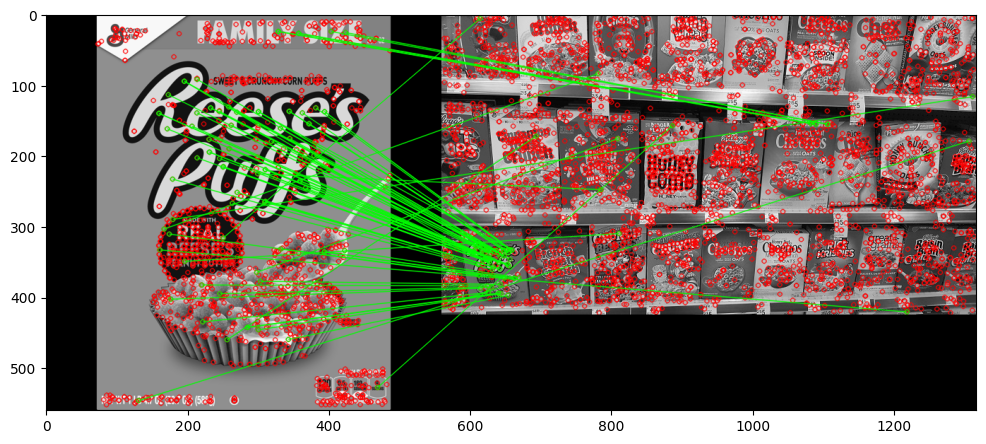

In [9]:
from re import search
sift=cv2.xfeatures2d.SIFT_create()
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)
flann=cv2.FlannBasedMatcher(index_params,search_params)
matches=flann.knnMatch(des1,des2,k=2)

matchesMask=[[0,0] for i in range(len(matches))]

for i,(match1,match2) in enumerate(matches):
  if match1.distance<0.75*match2.distance:
    matchesMask[i]=[i,0]

draw_params=dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)